<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/advanced/workshop5/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: [Hands-On Machine Learning with Scikit-Learn](https://https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_3?dchild=1&keywords=hands+on+learning+with+scikit+learn&qid=1617146018&s=books&sr=1-3) (Book)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)

  time = np.linspace(0, 1, n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)

  return series[..., np.newaxis].astype(np.float32)

In [ ]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)

X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

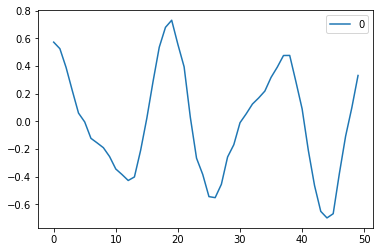

In [ ]:
pd.DataFrame(X_test[:1].reshape(1, 50).transpose()).plot()

In [ ]:
y_test.shape

(1000, 1)

### Baseline Metric

In [ ]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020830458

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[50, 1]),
  keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mse')

In [ ]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0625 - val_loss: 0.0405
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.0241
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0169
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0129
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0105
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0065

Advantages:
* Do not need to specify input size of the data; processes any number of time steps!

In [ ]:
sRNN = keras.models.Sequential([
                                 keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [ ]:
sRNN.compile(optimizer=keras.optimizers.Adam(), loss='mse')

In [ ]:
sRNN.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 7ms/step - loss: 0.2329 - val_loss: 0.1254
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1149 - val_loss: 0.0896
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0841 - val_loss: 0.0719
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0682 - val_loss: 0.0592
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0553 - val_loss: 0.0501
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0471 - val_loss: 0.0434
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0417 - val_loss: 0.0381
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0373 - val_loss: 0.0340
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0333 - val_loss: 0.0306
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0296 - val_loss: 0.0278

In [ ]:
dRNN = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20, return_sequences=True),
  keras.layers.Dense(1),
])

In [ ]:
dRNN.compile(optimizer=keras.optimizers.Adam(), loss='mse')

In [ ]:
dRNN.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 15ms/step - loss: 0.1759 - val_loss: 0.1404
Epoch 2/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1473 - val_loss: 0.1379
Epoch 3/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1427 - val_loss: 0.1362
Epoch 4/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1419 - val_loss: 0.1331
Epoch 5/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1305 - val_loss: 0.1248
Epoch 6/20
219/219 [==============================] - 3s 13ms/step - loss: 0.1137 - val_loss: 0.1021
Epoch 7/20
219/219 [==============================] - 3s 13ms/step - loss: 0.1057 - val_loss: 0.0994
Epoch 8/20
219/219 [==============================] - 3s 13ms/step - loss: 0.1028 - val_loss: 0.0965
Epoch 9/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0939 - val_loss: 0.0898
Epoch 10/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0918 - val_lo

In [ ]:
lstm = keras.models.Sequential([
  keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.LSTM(20, return_sequences=True),
  keras.layers.Dense(1),
])

Source: https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru (Kaggle Kernel)